<a href="https://colab.research.google.com/github/megha0511-cell/AQI-Air-Quality-Prediction/blob/main/AQI_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AQI Prediction using Machine Learning

This project predicts Air Quality Index (AQI) using machine learning.
It includes data cleaning, visualization and model training.




##  Problem Statement

Air pollution is a major environmental issue affecting human health.
The objective of this project is to predict the Air Quality Index (AQI)
based on pollutant levels using Machine Learning techniques.


## 1. Data cleaning

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving city_day.csv to city_day (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("city_day.csv")


In [ ]:
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.shape


(29531, 16)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.isnull().sum()


,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)


In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN,NaN


In [ ]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-4263470082.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,NaN
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,NaN
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,NaN
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,NaN
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,NaN


In [ ]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [ ]:
df.isnull().sum()


,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
df = df.drop_duplicates()


In [ ]:
cleaned_file_name = "city_day_cleaned.csv"
df.to_csv(cleaned_file_name, index=False)


# 2. Data Preparation

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/city_day_cleaned (1).csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,Moderate


In [ ]:
df.shape


(29531, 15)

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include='number').columns
date_cols = df.select_dtypes(include='datetime64').columns

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)
print("Date:", date_cols)


Categorical: Index(['City', 'Date', 'AQI_Bucket'], dtype='object')
Numerical: Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI'],
      dtype='object')
Date: Index([], dtype='object')


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype


dtype('<M8[ns]')

In [ ]:
df.isnull().sum()


,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
(df[numerical_cols] < 0).sum()


,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0
Benzene,0


In [ ]:
df.columns = df.columns.str.strip().str.replace('.', '_')
df.columns


Index(['City', 'Date', 'PM2_5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['AQI_Bucket_Encoded'] = le.fit_transform(df['AQI_Bucket'])

df[['AQI_Bucket', 'AQI_Bucket_Encoded']].head()


,AQI_Bucket,AQI_Bucket_Encoded
0,Moderate,1
1,Moderate,1
2,Moderate,1
3,Moderate,1
4,Moderate,1


In [ ]:
print("""
Preprocessing Steps:
1. Loaded cleaned dataset
2. Converted Date column to datetime
3. Checked and removed duplicates
4. Verified missing values
5. Fixed negative pollution values
6. Renamed columns
7. Encoded AQI_Bucket
""")



Preprocessing Steps:
1. Loaded cleaned dataset
2. Converted Date column to datetime
3. Checked and removed duplicates
4. Verified missing values
5. Fixed negative pollution values
6. Renamed columns
7. Encoded AQI_Bucket



# 3. Exploratory Data Analysis (EDA)

EDA is performed to understand the relationship between different pollutants and AQI.


In [ ]:
amaravati_df = df[df['City'] == 'Amaravati']


In [ ]:
amaravati_df.describe()


,Date,PM2_5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket_Encoded
count,951,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,2019-03-14 00:00:00,38.443049,77.479253,4.751493,22.147655,15.851157,12.211819,0.654637,13.909874,37.694353,0.587708,1.963785,97.925342,1.777077
min,2017-11-24 00:00:00,4.650000,7.800000,0.250000,1.520000,0.860000,0.300000,0.000000,2.900000,7.510000,0.000000,0.000000,24.000000,0.000000
25%,2018-07-19 12:00:00,17.765000,42.185000,2.110000,10.050000,7.610000,7.805000,0.470000,9.160000,25.945000,0.060000,0.230000,58.000000,1.000000
50%,2019-03-14 00:00:00,30.580000,68.720000,3.480000,16.170000,11.620000,11.880000,0.620000,12.580000,32.050000,0.150000,1.100000,86.000000,1.000000
75%,2019-11-06 12:00:00,50.485000,102.530000,5.810000,24.735000,20.920000,15.895000,0.890000,16.950000,44.330000,0.370000,2.970000,118.000000,3.000000
max,2020-07-01 00:00:00,139.380000,230.270000,43.760000,140.170000,103.490000,35.200000,1.840000,66.390000,138.180000,53.890000,76.320000,312.000000,5.000000
std,NaN,26.524121,42.840729,4.234385,19.959466,12.836262,5.693631,0.320290,6.695630,18.793565,3.192453,3.392665,53.214043,1.211671


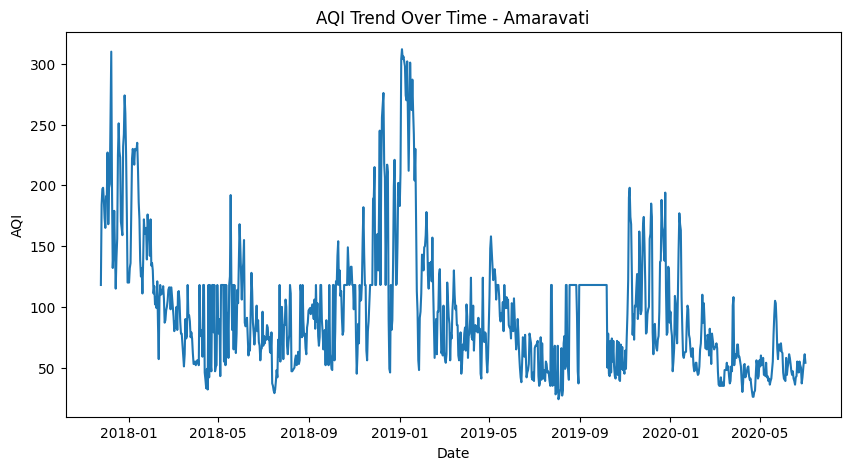

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(amaravati_df['Date'], amaravati_df['AQI'])
plt.title("AQI Trend Over Time - Amaravati")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()


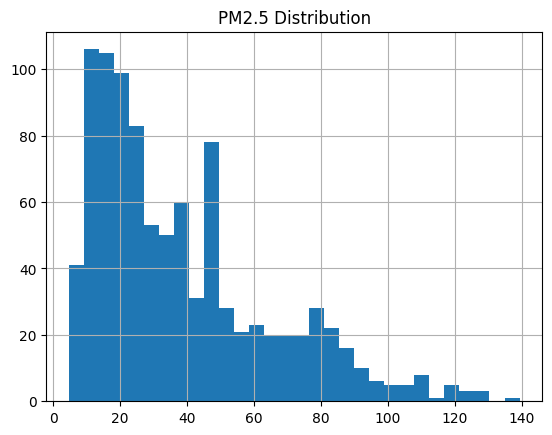

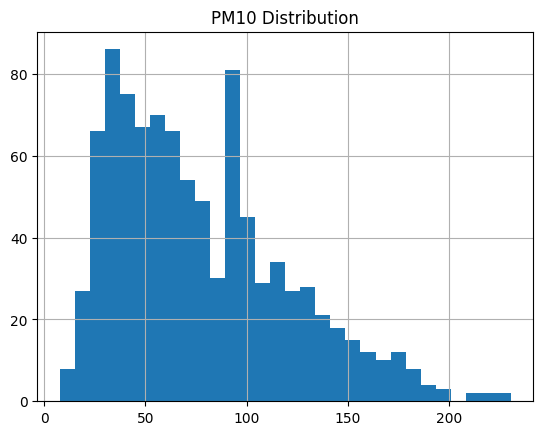

In [ ]:
amaravati_df['PM2_5'].hist(bins=30)
plt.title("PM2.5 Distribution")
plt.show()

amaravati_df['PM10'].hist(bins=30)
plt.title("PM10 Distribution")
plt.show()


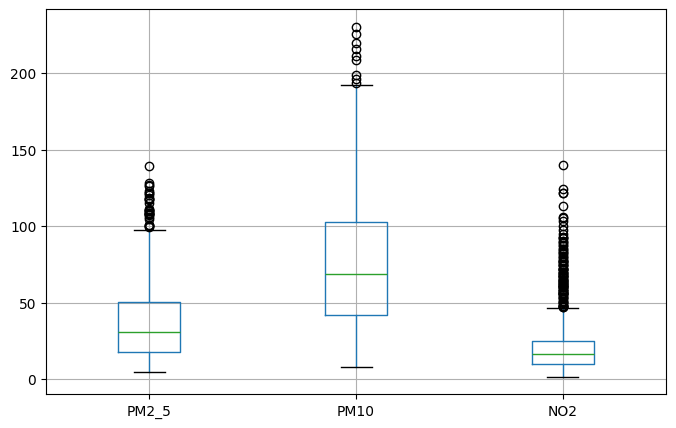

In [ ]:
amaravati_df[['PM2_5','PM10','NO2']].boxplot(figsize=(8,5))
plt.show()


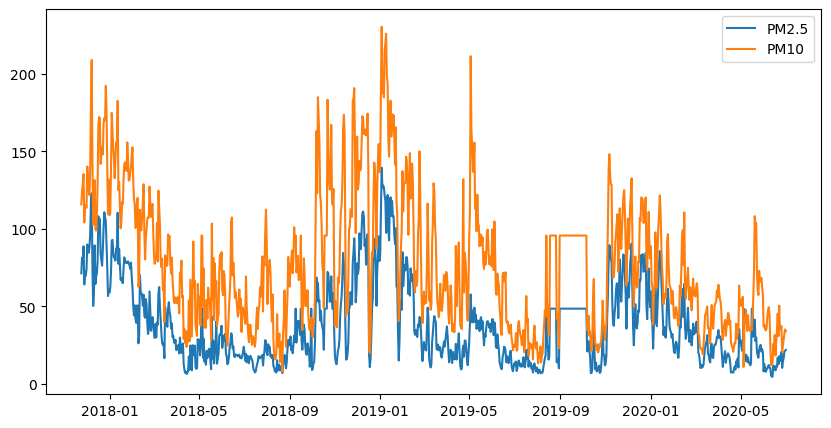

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(amaravati_df['Date'], amaravati_df['PM2_5'], label='PM2.5')
plt.plot(amaravati_df['Date'], amaravati_df['PM10'], label='PM10')
plt.legend()
plt.show()


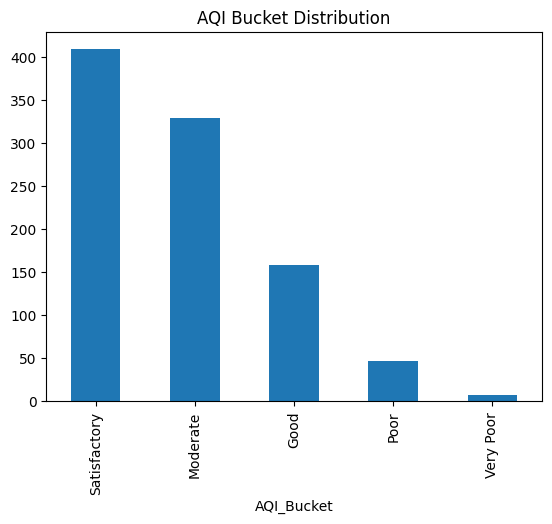

In [ ]:
amaravati_df['AQI_Bucket'].value_counts().plot(kind='bar')
plt.title("AQI Bucket Distribution")
plt.show()


In [ ]:
numerical_cols = df.select_dtypes(include='number').columns


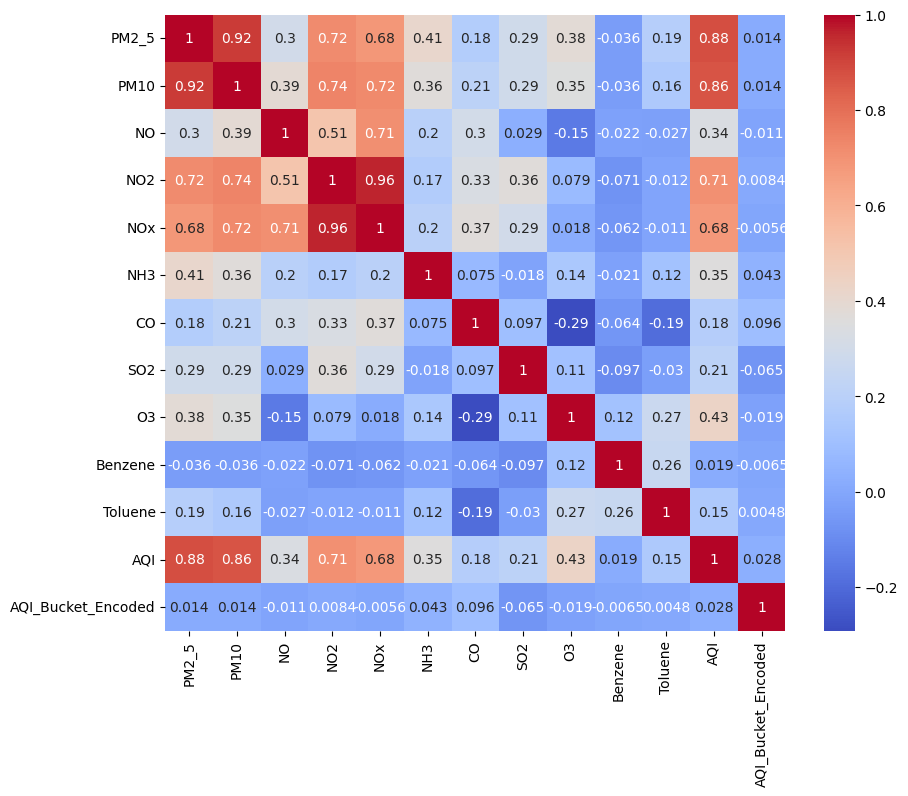

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(amaravati_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
amaravati_df[numerical_cols].corr()['AQI'].sort_values(ascending=False)


,AQI
AQI,1.000000
PM2_5,0.883402
PM10,0.864292
NO2,0.705337
NOx,0.680075
O3,0.430354
NH3,0.354431
NO,0.336437
SO2,0.209547
CO,0.181756


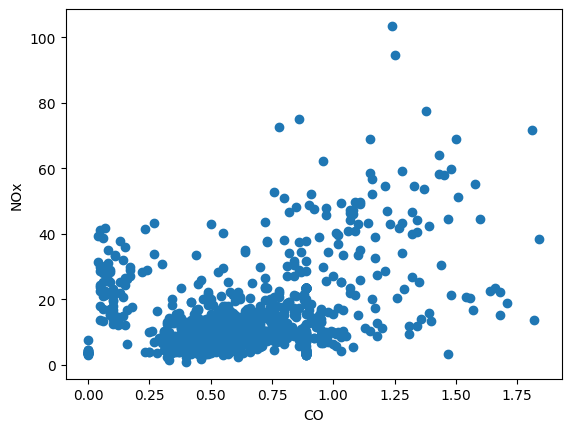

In [ ]:
plt.scatter(amaravati_df['CO'], amaravati_df['NOx'])
plt.xlabel("CO")
plt.ylabel("NOx")
plt.show()


In [ ]:
amaravati_df.loc[amaravati_df['AQI'].idxmax()]


,2528
City,Amaravati
Date,2019-01-04 00:00:00
PM2_5,126.47
PM10,187.83
NO,9.48
NO2,106.1
NOx,64.14
NH3,9.27
CO,1.43
SO2,15.29


In [ ]:
amaravati_df.groupby('AQI_Bucket')['AQI'].mean()


,AQI
AQI_Bucket,
Good,41.550633
Moderate,131.009119
Poor,237.212766
Satisfactory,73.031785
Very Poor,305.125000


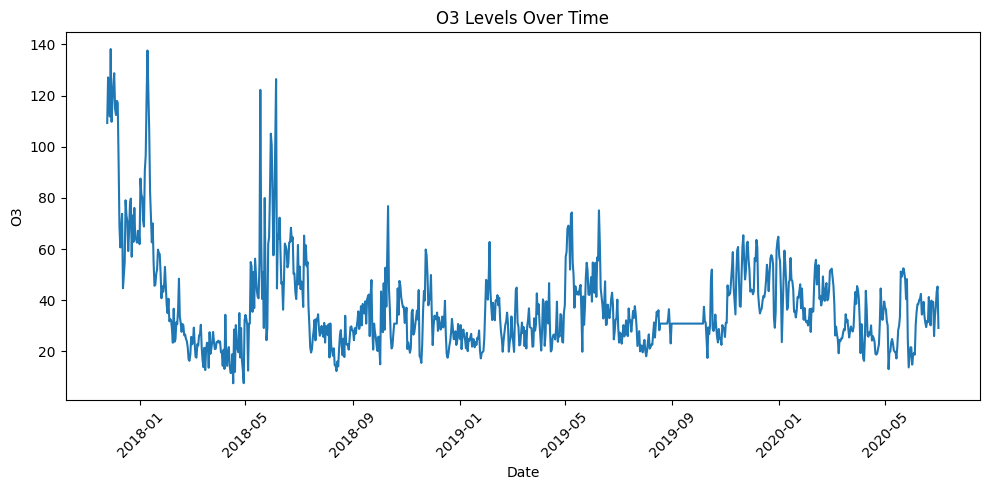

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(amaravati_df['Date'], amaravati_df['O3'])

plt.title("O3 Levels Over Time")
plt.xlabel("Date")
plt.ylabel("O3")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
amaravati_df[numerical_cols].std().sort_values(ascending=False)


,0
AQI,53.214043
PM10,42.840729
PM2_5,26.524121
NO2,19.959466
O3,18.793565
NOx,12.836262
SO2,6.695630
NH3,5.693631
NO,4.234385
Toluene,3.392665


In [ ]:
amaravati_df.groupby('AQI_Bucket')['PM2_5'].mean().loc[['Moderate','Satisfactory']]


,PM2_5
AQI_Bucket,
Moderate,53.259483
Satisfactory,27.382176


Insight 1:
PM2.5 and PM10 show strong positive correlation with AQI, indicating particulate matter is the major contributor to air pollution in Amaravati.

Insight 2:
Higher AQI values are concentrated in the Moderate category, suggesting periodic air quality degradation rather than constant severe pollution.

Insight 3:
Ozone (O3) levels fluctuate over time but show weaker correlation with AQI compared to particulate pollutants.

# 4. Model Building

In this section, we train Machine Learning models to predict AQI.
Models used:
- Random Forest Regression


In [ ]:
features = ['PM2_5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
target = 'AQI'
df = df.dropna(subset=[target])
df[features] = df[features].fillna(df[features].median())

X = df[features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train

,PM2_5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
6688,142.27,252.49,17.11,33.82,50.91,9.80,4.36,17.18,17.68,0.00,2.97
29333,75.61,121.94,2.95,27.03,16.78,15.92,1.12,8.24,74.21,4.93,7.53
27996,15.01,27.65,3.25,7.99,9.71,6.01,0.48,5.80,29.78,1.07,2.97
26848,48.57,95.68,9.89,21.69,23.52,15.85,0.89,9.16,30.84,1.07,2.97
21186,16.66,95.68,7.44,28.00,23.79,28.83,0.82,5.03,14.32,0.09,0.21
...,...,...,...,...,...,...,...,...,...,...,...
21575,21.75,95.68,7.97,18.64,16.24,2.02,0.91,4.19,26.03,1.05,3.61
5390,38.06,74.54,9.91,42.23,22.62,15.85,1.04,3.20,25.89,1.07,2.97
860,48.57,95.68,9.89,21.69,23.52,15.85,0.89,9.16,30.84,1.07,2.97
15795,36.08,95.82,5.67,31.21,18.75,15.34,0.70,5.92,48.88,0.88,3.81


In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
y_pred

array([118.  , 118.  , 128.29, ..., 127.71,  71.85, 150.73])

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


Model Evaluation:
MAE : 19.98544123293359
MSE : 1823.102140238471
RMSE: 42.697800180319256
R2 Score: 0.8815741623836328


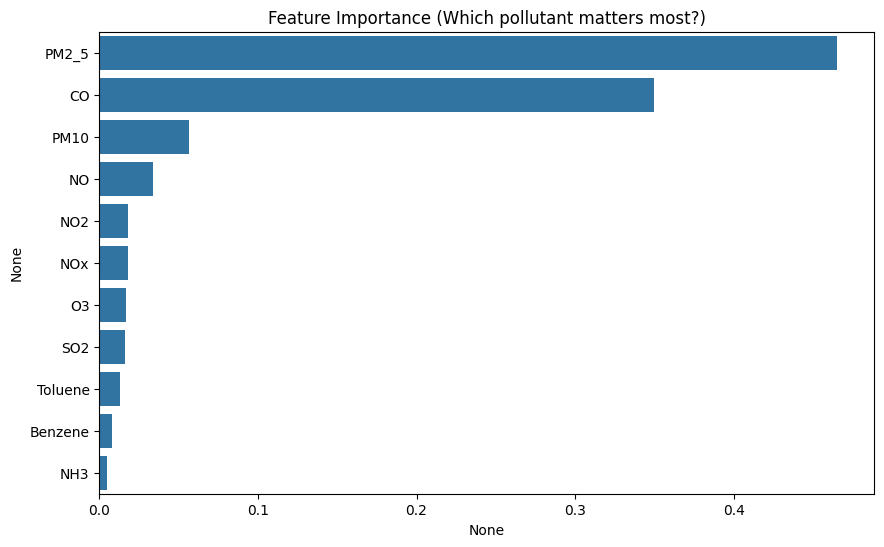

In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance (Which pollutant matters most?)')
plt.show()

##  Conclusion

After comparing multiple models, Random Forest performed better
with higher R2 score and lower error values.

This project demonstrates that Machine Learning can effectively
predict AQI using pollutant data.

Future improvements may include:
- Using larger datasets
- Deploying the model as a web application
- Using advanced algorithms like XGBoost
